In [569]:
# Import packages
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import zipfile
import re
import datetime


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [398]:
import warnings
warnings.filterwarnings('ignore')

In [399]:
results = pd.read_csv('data/data_survey_dump_lebanon.csv')
new_results = results[results.selected != 0 ]
people = pd.read_csv('data/data_people_dump_lebanon.csv')
merged = pd.merge(new_results, people, how='inner', on=['uuid'])

proposals = pd.read_csv('data/Lebanocracia.csv')

In [ ]:
# Separating Male / Female, Every Age, and Every Region to analyze the 17 most controversial topics

In [ ]:
# creating a list of empty arrays: 
# n = 5
# lists = [[] for i in range(n)]

In [ ]:
################## GENDER

In [406]:
# Separates Male / Female / Other into genders[0], genders[1], genders[2]

gender = merged['sex'].unique()
n = len(gender)
genders = [[] for i in range (n)]
for i in range(n):
    genders[i] = merged[merged['sex']==gender[i]]
    

In [407]:
# Gets the wins of genders[0], genders[1], genders[2]

wins_gender = [[] for i in range(len(gender))]

for i in range(len(gender)):
    for x in range(1,91):
        a = genders[i]['option_a']==x
        a = genders[i][a]
        b = genders[i]['option_b']==x
        b = genders[i][b]
        w = genders[i]['selected']==x
        w = genders[i][w]
        win = len(w)/(len(a)+len(b))
        wins_gender[i].append(win)

In [ ]:
# join the wins score with the proposals to get the id 

score_gender = [[] for i in range(len(gender))]
scores_gender = [[] for i in range(len(gender))]

for i in range(len(gender)):
    score_gender[i] = pd.DataFrame(wins_gender[i], columns = ['score'])
    score_gender[i].sort_values(by=['score'])
    scores_gender[i] = score_gender[i].join(proposals)

In [ ]:
# finding scores of controversial topics for every gender from list 
# https://docs.google.com/spreadsheets/d/1_WRjy7HjsQBiwDsObVx1ul6iO8fV74pne7u5MDTPtPM/edit#gid=0

controversial=[1,4,6,10,11,17,25,33,34,35,36,38,40,42,45,75,88]
score_gender_controversial = [[] for i in range(len(gender))]
#gendertable = {}

for i in range(len(gender)):
    #gendertable[i]= pd.DataFrame(columns=['score', 'long_name', 'proposal_id', 'short_name', 'topic_id',
       #'topic_name'])
    for j in controversial:
        score_gender_controversial[i].append(scores_gender[i][scores_gender[i]['proposal_id']==j])
        #gendertable[i] = gendertable[i].append(score_gender_controversial[i][j], ignore_index=True)

In [408]:
# score of female of controversial topics
score_female = pd.DataFrame(columns=score_gender_controversial[0][1].columns)
for i in range(17):
    score_female = score_female.append(score_gender_controversial[0][i], ignore_index=True)
score_female_renamed = score_female.rename(columns={"score": "score_female"})

# score of male of controversial topics
score_male = pd.DataFrame(columns=score_gender_controversial[1][1].columns)
for i in range(17):
    score_male = score_male.append(score_gender_controversial[1][i], ignore_index=True)
score_male_renamed = score_male.rename(columns={"score": "score_male"})

# score of other of controversial topics
score_other = pd.DataFrame(columns=score_gender_controversial[1][1].columns)
for i in range(17):
    score_other = score_other.append(score_gender_controversial[2][i], ignore_index=True)
score_other_renamed = score_other.rename(columns={"score": "score_other"})

In [ ]:
# joining the three dataframes
outer_merged_1 = pd.merge(score_female_renamed, score_male_renamed)
outer_merged = pd.merge(outer_merged_1, score_other_renamed)
droped = outer_merged.drop(['topic_id','proposal_id'],axis=1)

<AxesSubplot:xlabel='short_name'>

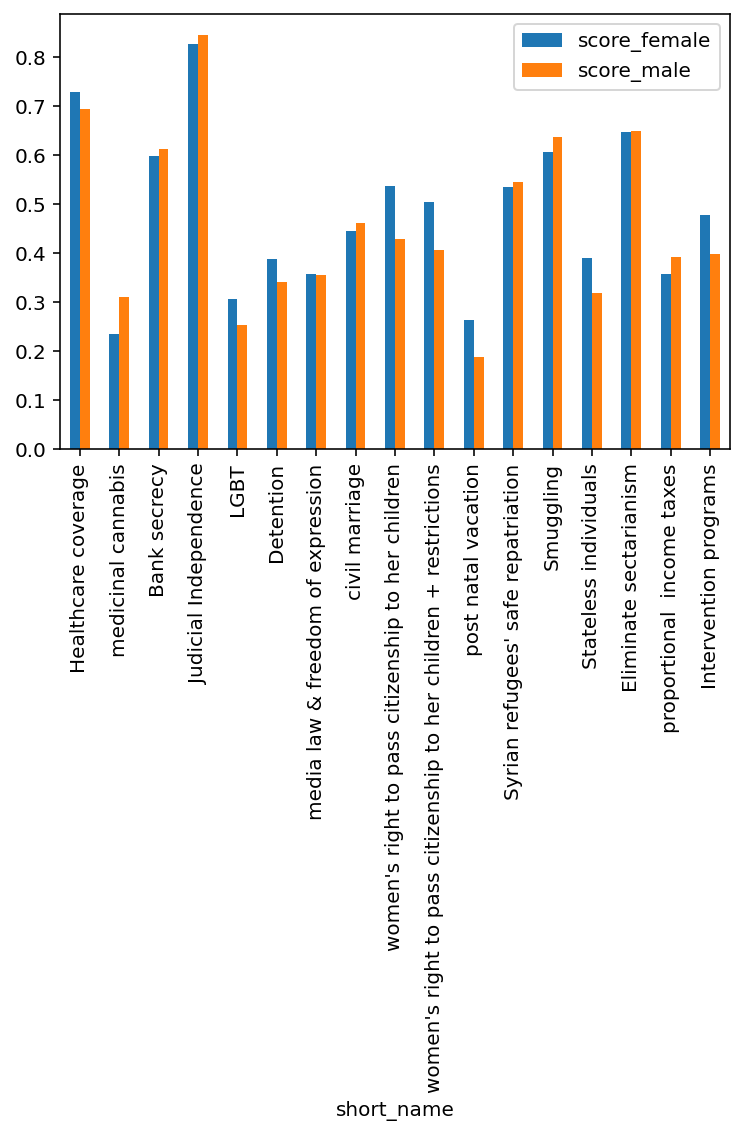

In [409]:
outer_merged.plot(x="short_name", y=["score_female","score_male"], kind="bar")

In [ ]:
################## 

In [417]:
# Separates Region into regions[0]...

region = merged['region'].unique()
n_region = len(region)
regions = [[] for i in range (n_region)]
for i in range(n_region):
    regions[i] = merged[merged['region']==region[i]]

In [422]:
# Gets the wins of regionss[0]...

wins_region = [[] for i in range(len(region))]

for i in range(len(region)):
    for x in range(1,91):
        a = regions[i]['option_a']==x
        a = regions[i][a]
        b = regions[i]['option_b']==x
        b = regions[i][b]
        w = regions[i]['selected']==x
        w = regions[i][w]
        win = len(w)/(len(a)+len(b))
        wins_region[i].append(win)

In [432]:
# join the wins score with the proposals to get the id 

score_region = [[] for i in range(len(region))]
scores_region = [[] for i in range(len(region))]

for i in range(len(region)):
    score_region[i] = pd.DataFrame(wins_region[i], columns = ['score'])
    score_region[i].sort_values(by=['score'])
    scores_region[i] = score_region[i].join(proposals)

In [434]:
# finding scores of controversial topics for every region from list 
# https://docs.google.com/spreadsheets/d/1_WRjy7HjsQBiwDsObVx1ul6iO8fV74pne7u5MDTPtPM/edit#gid=0

controversial=[1,4,6,10,11,17,25,33,34,35,36,38,40,42,45,75,88]
score_region_controversial = [[] for i in range(len(region))]

for i in range(len(region)):
    for j in controversial:
        score_region_controversial[i].append(scores_region[i][scores_region[i]['proposal_id']==j])


In [436]:
region

array(['Mount Lebanon', 'Lebanese diaspora', 'Beirut', 'Akkar',
       'North Lebanon', 'Beqaa', 'South Lebanon', 'Nabatiyeh',
       'Baalbek-Hermel'], dtype=object)

In [557]:
r_df = {}
r_df_renamed = {}
for r in range(len(region)):
    r_df[r] = pd.DataFrame(columns=score_region_controversial[0][1].columns)
    r_df_renamed[r] = pd.DataFrame(columns=score_region_controversial[0][1].columns)
    for i in range(17):
        r_df[r]=r_df[r].append(score_region_controversial[r][i], ignore_index=True)
        r_df_renamed[r]=r_df[r].rename(columns={"score": r})

In [563]:
region_df1 = pd.merge(r_df_renamed[0],r_df_renamed[1])
region_df2 = pd.merge(region_df1,r_df_renamed[2])
region_df3 = pd.merge(region_df2,r_df_renamed[3])
region_df4 = pd.merge(region_df3,r_df_renamed[4])
region_df5 = pd.merge(region_df4,r_df_renamed[5])
region_df6 = pd.merge(region_df5,r_df_renamed[6])
region_df7 = pd.merge(region_df6,r_df_renamed[7])
region_df8 = pd.merge(region_df7,r_df_renamed[8])

In [576]:
region

array(['Mount Lebanon', 'Lebanese diaspora', 'Beirut', 'Akkar',
       'North Lebanon', 'Beqaa', 'South Lebanon', 'Nabatiyeh',
       'Baalbek-Hermel'], dtype=object)

<AxesSubplot:xlabel='long_name'>

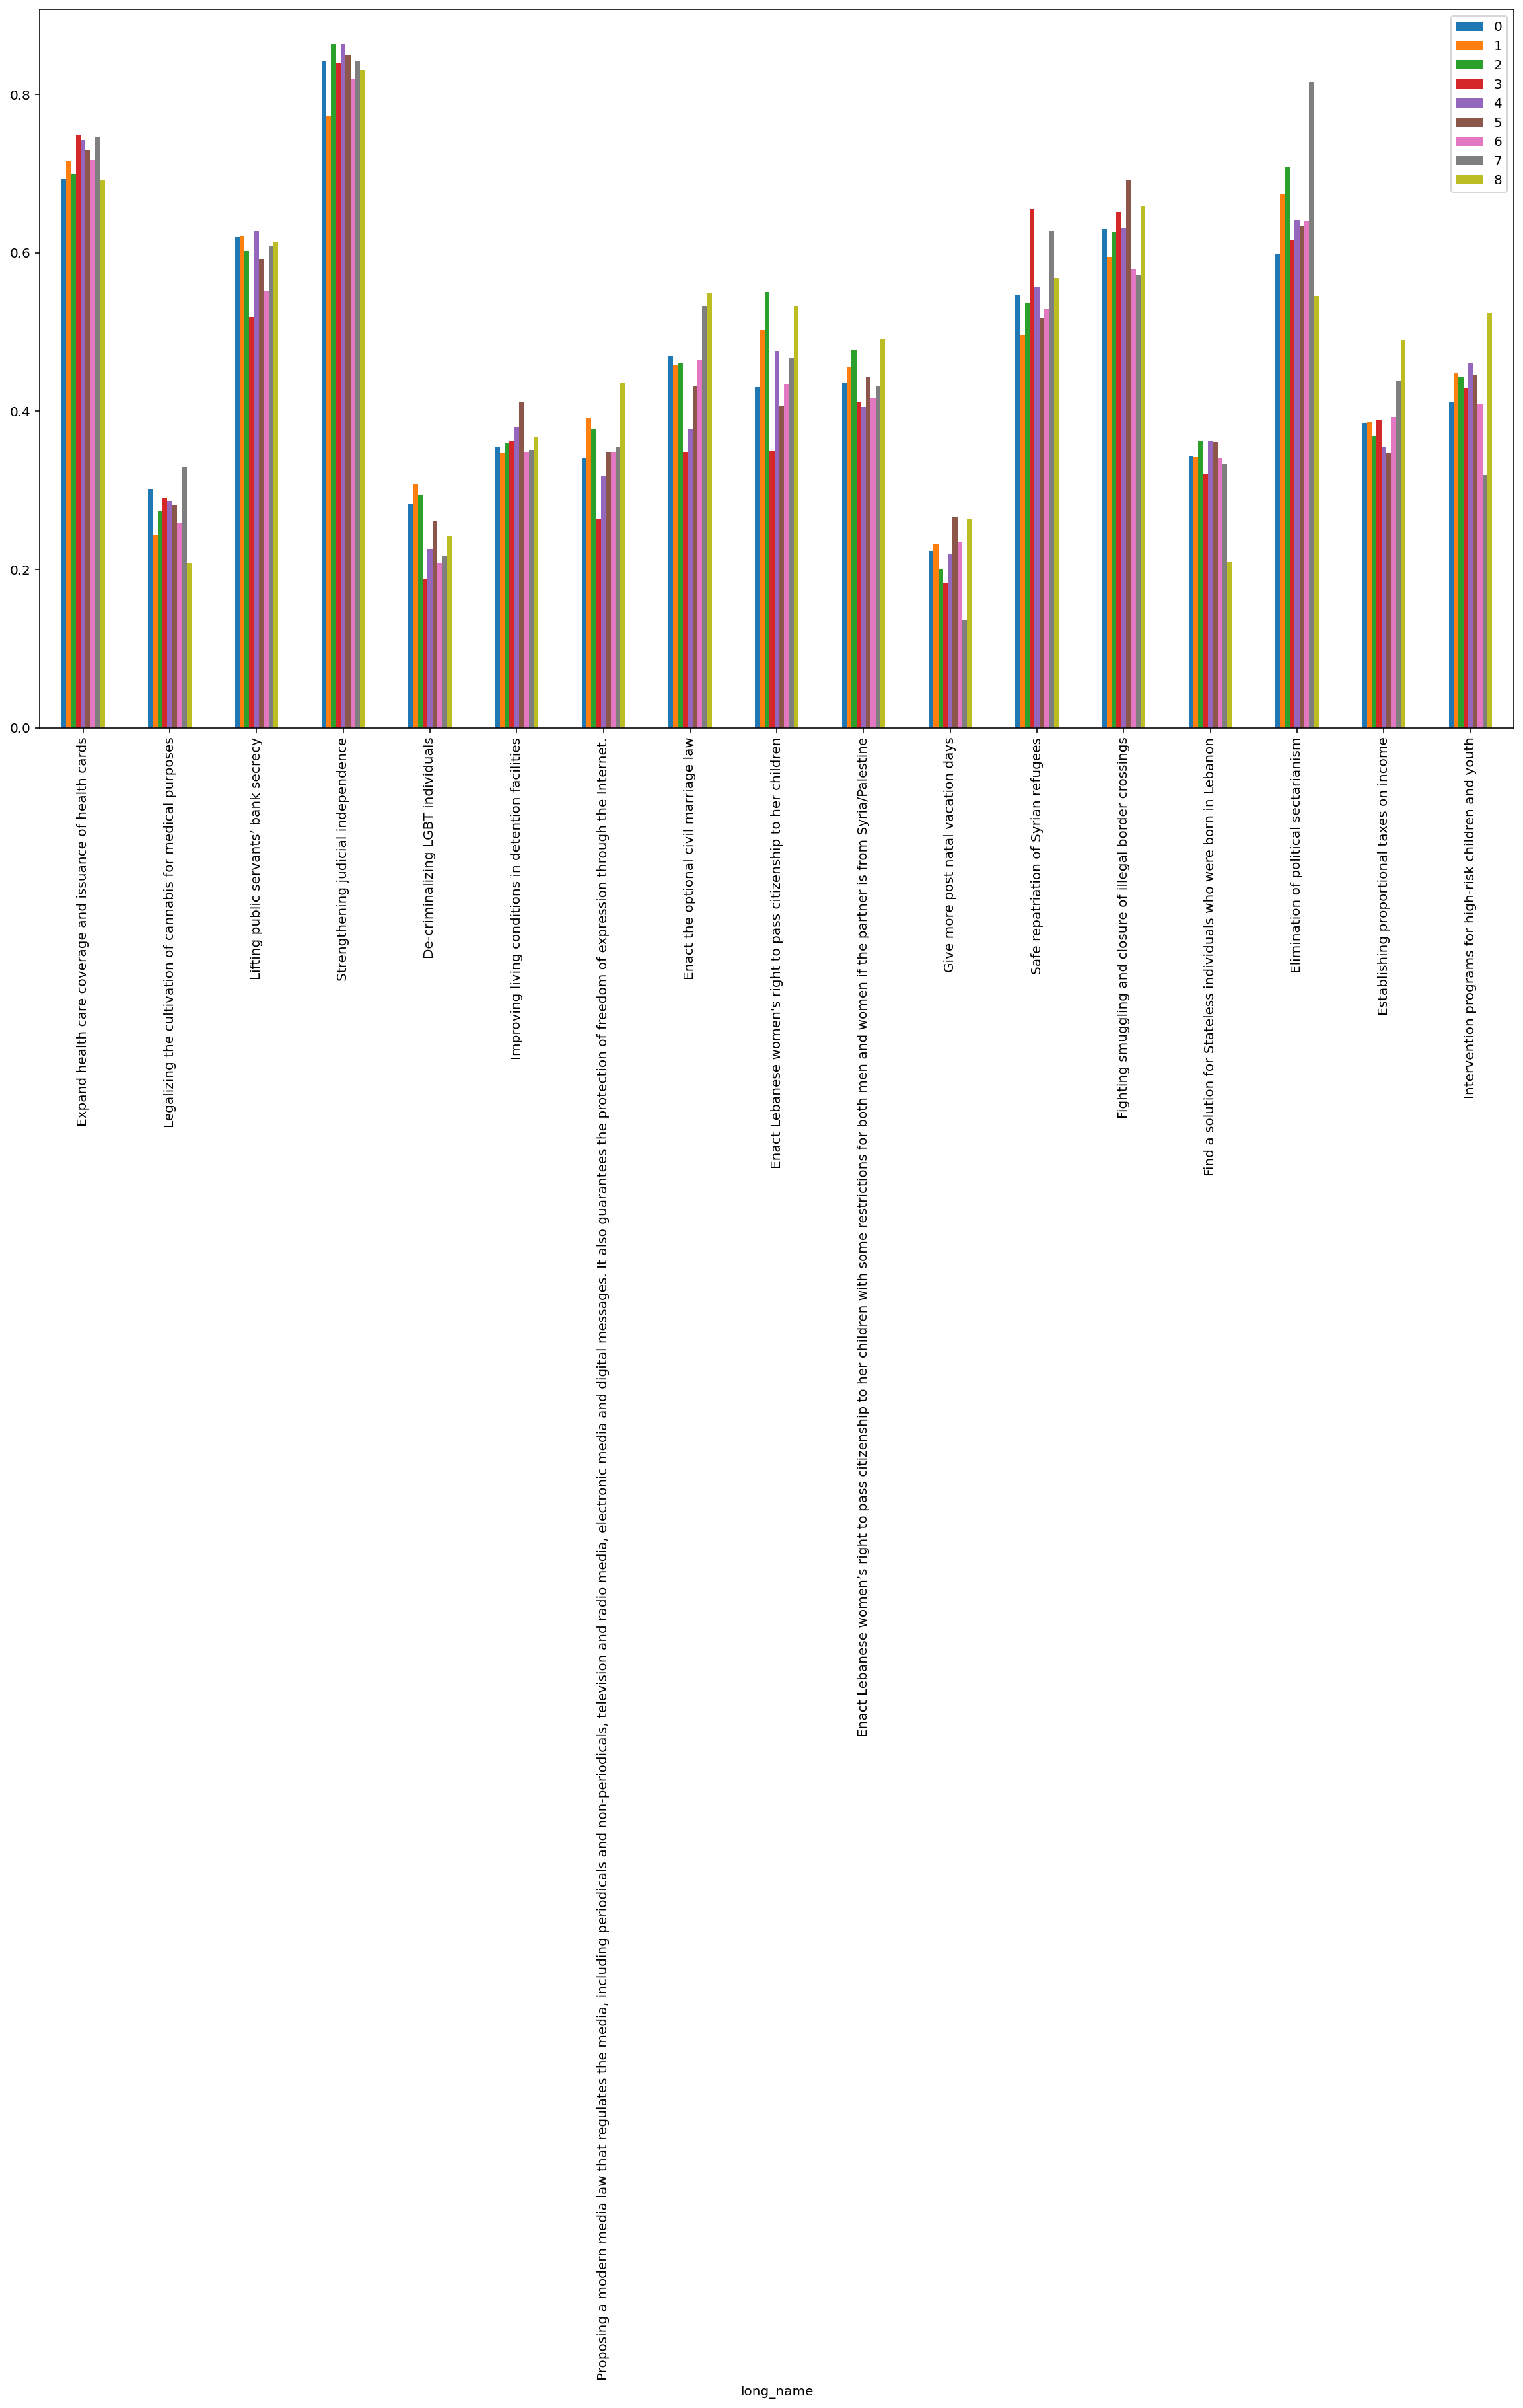

In [574]:
region_df8.plot(x="long_name", y=[0,1,2,3,4,5,6,7,8], kind="bar",figsize=(20, 10))